In [2]:
from os.path import expanduser, join
import sys
user_home_dir = expanduser('~')
sys.path.insert(0, join(user_home_dir,'efs_ecco/sdarma/emu-utilities'))
from emu_utilities.adjoint_gradient import load_adjoint_gradient
import xarray as xr
import matplotlib.pyplot as plt
from emu_utilities import adjoint_gradient, attribution, convolution, forward_gradient, sampling, tracer


In [3]:
##1. Insert the covnolution file 
ds_conv = convolution.load_1d_conv_gradient("/efs_ecco/sdarma/ECCO/EMU/SOWARM/emu_conv_302_302_3_mask3d.0.0_0.0_-69.0_-61.0_50.0_0.0_1_1313")
# Calculate and plot explained variance at a specific lag as a function of control variable


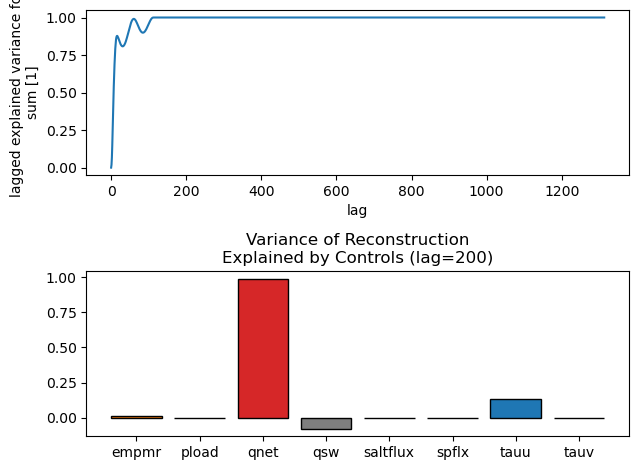

In [22]:
##2. now plot the convolution file
import seaborn as sns
fig, ax  = plt.subplots(2, 1)
#convolution.ctrl_variance(ds_conv, lag=10).plot.scatter(ax = ax[0])
# Calculate and plot explained variance of all controls at a specific lag
convolution.lagged_variance(ds_conv, variable="sum").plot(ax = ax[0])
var_color = {"sum":"saddlebrown", "tauu":sns.color_palette("tab10")[0],
             "qnet":sns.color_palette("tab10")[3], "pload":sns.color_palette("tab10")[2],
             "empmr":sns.color_palette("tab10")[1],
             "saltflux":sns.color_palette("tab10")[5], "tauv":sns.color_palette("tab10")[6],
            "qsw":sns.color_palette("tab10")[7], "spflx":sns.color_palette("tab10")[8]}
ctrl_variance = convolution.ctrl_variance(ds_conv, lag=200)
controls   = ctrl_variance["control"].values
values     = [ctrl_variance.sel(control = c).values for c in controls]
bar_colors = [var_color[c] for c in controls]
ax[1].bar(controls, values, color=bar_colors, edgecolor="black",   # outline color
    linewidth=1.0 )
ax[1].set_xlabel("")
ax[1].set_title("Variance of Reconstruction\nExplained by Controls (lag=200)")
fig.tight_layout()
plt.savefig(f'/home/jovyan/efs_ecco/sdarma/FIGURES/CONVOLUTION1.png',dpi=200)
fig